In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pathlib
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
import os
from google.colab import data_table
import seaborn as sb
%matplotlib inline

In [ ]:
image_data = os.listdir('/content/drive/MyDrive/images/image')

In [ ]:
print(len(image_data))

51


In [ ]:
class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [ ]:
fe = FeatureExtractor()

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
for img_path in tqdm(os.listdir("/content/drive/MyDrive/images/image")):
    # Extract Features
    feature = fe.extract(img=Image.open('/content/drive/MyDrive/images/image/' + str(img_path)))
    # Save the Numpy array (.npy) on designated path
    feature_path = "/content/drive/MyDrive/demo/features/{}.npy".format(str(img_path).replace('.jpg',''))
    np.save(feature_path, feature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
features = []
for f in tqdm(os.listdir("/content/drive/MyDrive/demo/features")):
  add_feature = np.load("/content/drive/MyDrive/demo/features/" + str(f))
  add_feature = pd.DataFrame([add_feature])
  add_feature['image'] = f.replace('.npy','.jpg')

  features.append(add_feature)

features = pd.concat(features, axis=0)
features.to_csv('/content/drive/MyDrive/demo/feature_extraction.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/demo/feature_extraction.csv')

In [ ]:
id = pd.read_csv('/content/drive/MyDrive/demo/product_id.csv')

In [ ]:
features.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,image
0,0.00913,0.0,0.010316,0.0,0.0,0.0,0.018621,0.000000,0.0,0.000000,0.032698,0.0,0.0,0.0,0.0,0.0,0.0,0.012790,0.014782,0.0,0.0,0.0,0.007601,0.0,0.0,0.000000,0.0,0.0,0.002199,0.0,0.0,0.016427,0.0,0.0,0.0,0.000000,0.0,0.006209,0.005484,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.027755,0.0,0.0,0.0,0.005137,0.000000,0.0,0.010652,0.0,0.0,0.036467,0.014519,0.004775,0.0,0.0,0.0,0.006232,0.011336,0.0,0.0,0.0,0.046640,0.0,0.0,0.022389,0.014243,0.000000,0.0,0.029221,0.0,0.006351,0.0,0.0,0.013595,11.jpg
1,0.00000,0.0,0.074717,0.0,0.0,0.0,0.036539,0.007001,0.0,0.015252,0.013471,0.0,0.0,0.0,0.0,0.0,0.0,0.034724,0.000000,0.0,0.0,0.0,0.028412,0.0,0.0,0.006422,0.0,0.0,0.007936,0.0,0.0,0.020168,0.0,0.0,0.0,0.000052,0.0,0.000000,0.013246,0.0,...,0.0,0.009367,0.00986,0.0,0.002453,0.043105,0.0,0.0,0.0,0.000000,0.019463,0.0,0.000000,0.0,0.0,0.027846,0.000000,0.016531,0.0,0.0,0.0,0.006562,0.000000,0.0,0.0,0.0,0.044907,0.0,0.0,0.064628,0.000000,0.002357,0.0,0.033277,0.0,0.014654,0.0,0.0,0.039479,12.jpg


In [ ]:
id.head()

,id
0,1
1,2
2,3
3,4
4,5


In [ ]:
from google.colab import files
files.upload()

Saving ball.jfif to ball.jfif


{'ball.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x15\x16\x15\x18\x16\x15\x16\x18\x19\x18\x1a\x1c\x1a\x1c\x1c\x1c\x1c\x1c\x1d\x1f\x1c\x1e\x1c\x18\x18\x1a\x1c\x1a\x1e\x1e\x1e\x1c!.%\x1e!+\x1f\x18\x18&8\'+/1555\x1a$;@;4?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1e\x12\x12\x1f4\'%%1446414444444444444444444444444444444444444444444@\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00=\x10\x00\x01\x02\x02\x06\x08\x04\x04\x06\x01\x04\x03\x01\x00\x00\x00\x01\x00\x02\x11!\x03\x041AQ\xf0\x05\x06\x12aq\x81\x91\xa1"\xb1\xc1\xd12B\xe1\xf1\x07\x13Rr\x92\xa2\x82#Cb\xc2\x14\xb2\xd3\xd2\xff\xc4\x00\x19\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00&\x11\x00\x03\x00\x02\x02\x01\x03\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x11!1\x1

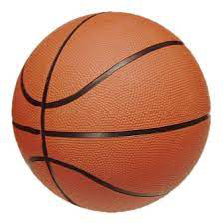

In [ ]:
img_name = 'ball.jfif'
img = load_img((img_name), target_size=(224, 224))
img

In [ ]:
query = fe.extract(img)
# Calculate the similarity (distance) between images
features_data = features.copy()
features_data = features_data.drop(columns = ['image'])
features_data = features_data.values
dists = np.linalg.norm(features_data - query, axis=1)

# Extract images that have lowest distance
ids = np.argsort(dists)[:5]
lookalike_imgs = features.iloc[ids,:]['image']
product_id = id.iloc[ids,:]['id']
scores = pd.DataFrame({'image': lookalike_imgs})
                       #'score': dists[ids]})
scores = scores.reset_index(drop=True)
result,id = lookalike_imgs,product_id
print(result,id)
#print(lookalike_imgs,product_id)

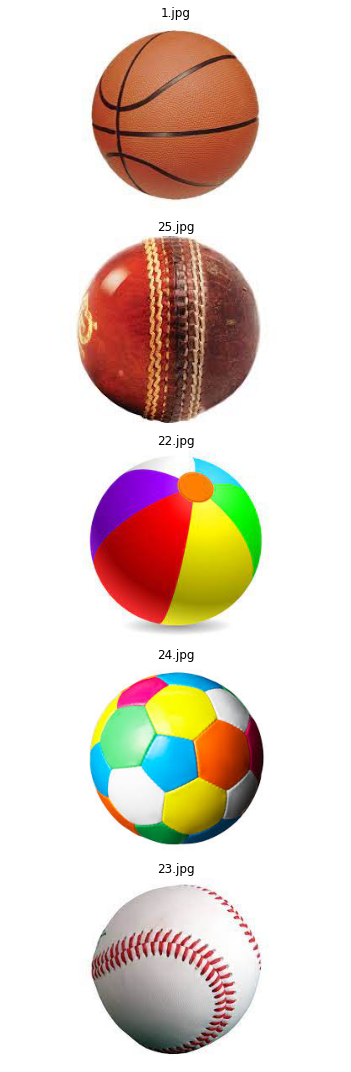

,image
0,1.jpg
1,25.jpg
2,22.jpg
3,24.jpg
4,23.jpg


In [ ]:
# Visualize the result
axes=[]
fig=plt.figure(figsize=(15,15))
for a in range(5):
    result = []
    result = result.append(scores['image'][a])
    #score = scores['score'][a]
    axes.append(fig.add_subplot(5, 1, a+1))
    subplot_title=str(scores['image'][a])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open('/content/drive/MyDrive/images/image/' + scores['image'][a]))
fig.tight_layout()
plt.show()
data_table.DataTable(scores)